In [1]:
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb_double")
from PDE2D.Solver import *
from PDE2D.Coefficient import *
from PDE2D.BoundaryShape import *
from PDE2D import PATH
import os

In [2]:
file = "1_0"
fileset = os.path.join(PATH ,f"eit-data/data-mat-files/datamat_{file}.mat")
injection_set = "skip3"
RADIUS = 0.14
normalization = True
resolution = 128
spe = 2 ** 18
conf_numbers = [UInt32(0), UInt32(1), UInt32(2), UInt32(3), UInt32(4), UInt32(5)]
bg = 0.95
delete_injection = True
num_electrodes = 16

In [3]:
out_shape = CircleWithElectrodes(radius = RADIUS, is_delta = True, injection_set=injection_set, fileset=fileset)
shape = BoundaryWithDirichlets(out_shape, dirichlet_boundaries=[CircleShape(radius = RADIUS * 1e-3)], dirichlet_values = [[0]])
α = ConstantCoefficient("diffusion", value = bg)
data_holder = DataHolder(α=α, shape = shape)
wos = WostConstant(data_holder)
voltages = out_shape.voltages


In [4]:
points_el, active_conf, electrode_nums = wos.input.shape.out_boundary.create_electrode_points(spe = spe, delete_injection = delete_injection, 
                                                                                     conf_numbers = conf_numbers)
L, particle = wos.solve(points_el, active_conf, conf_numbers=conf_numbers, all_inside = True)
el_result , el_std = create_electrode_result(L, spe, electrode_nums, apply_normalization=True, compute_std = True)

Text(0.5, 1.0, 'spe = 2 ** 18')

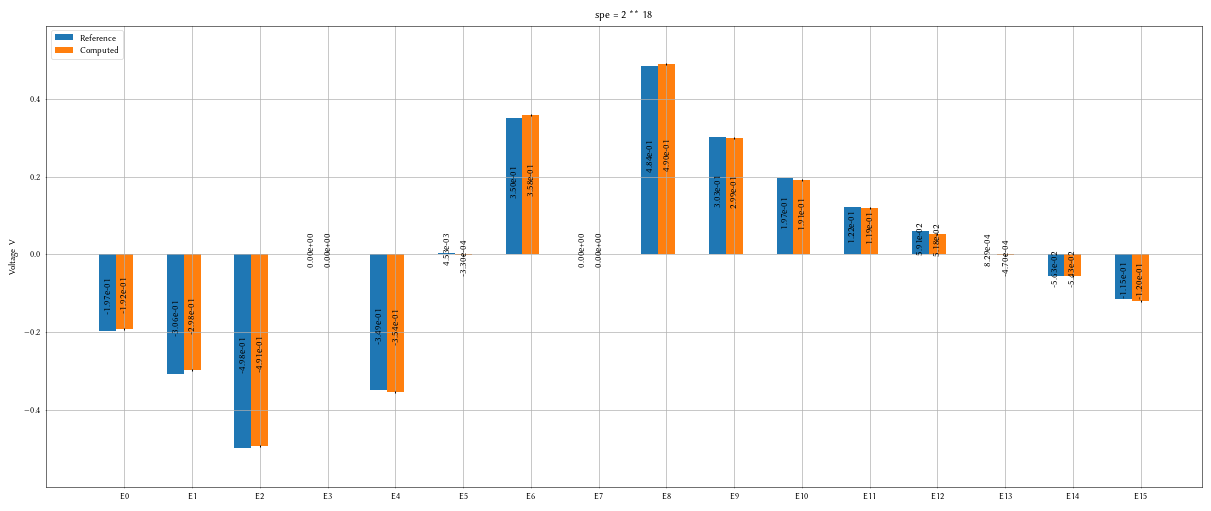

In [5]:
k = 3
fig, ax = plt.subplots(layout='constrained', figsize = (12,5))
plot_primals(ax, el_result[k], out_shape.voltages[k], electrode_nums, num_electrodes, std1=el_std[k], std2 =np.zeros(num_electrodes), 
             name1 = "Computed", name2 = "Reference")
ax.set_title(f"spe = 2 ** {dr.log2i(spe)}")